In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [0]:
rdata=pd.read_csv('/content/drive/My Drive/Bulldozer Data/bluebook-for-bulldozers/Train/Train.csv', low_memory=False, parse_dates=['saledate'] )

In [3]:
rdata.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [0]:
data1=rdata.copy()

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [7]:
data1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# We have Object Values and to be converted to Float #

In [0]:
def assigncat(data,column):
    list1=[]
    for i in data[column].unique(): #Avoiding Repeated values in string
    list1.append(i)
    try:
    list1.remove(np.nan) # Removing NAN/Empty Values, We only require string values 
    except Exception as e:
    pass

    data[column+'_new'] = pd.Categorical(data[column], categories=cat, ordered=True).codes #adding new columns
    data.replace(-1,np.nan,inplace=True) # 

In [0]:
for i in data1.columns:
    if data1[i].dtype=='O':
    try:
        assigncat(data1,i)
    except Exception as e:
        pass


**We Need to classify the data based on year, So we need to convert the 'date' data into 'year' data**

In [ ]:
data1['saleyear']=data1['saledate'].dt.year
data1.drop('saledate', axis=1,inplace=True)

In [0]:
data1.SalePrice=np.log(data1.SalePrice)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                        401125 non-null int64
SalePrice                      401125 non-null float64
MachineID                      401125 non-null int64
ModelID                        401125 non-null int64
datasource                     401125 non-null int64
auctioneerID                   380989 non-null float64
YearMade                       401125 non-null int64
MachineHoursCurrentMeter       142765 non-null float64
UsageBand_New                  69639 non-null float64
fiModelDesc_New                401125 non-null int16
fiBaseModel_New                401125 non-null int16
fiSecondaryDesc_New            263934 non-null float64
fiModelSeries_New              56908 non-null float64
fiModelDescriptor_New          71919 non-null float64
ProductSize_New                190350 non-null float64
fiProductClassDesc_New         401125 non-null int8
state_New                    

In [13]:
data1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand_New,fiModelDesc_New,fiBaseModel_New,fiSecondaryDesc_New,fiModelSeries_New,fiModelDescriptor_New,ProductSize_New,fiProductClassDesc_New,state_New,ProductGroup_New,ProductGroupDesc_New,Drive_System_New,Enclosure_New,Forks_New,Pad_Type_New,Ride_Control_New,Stick_New,Transmission_New,Turbocharged_New,Blade_Extension_New,Blade_Width_New,Enclosure_Type_New,Engine_Horsepower_New,Hydraulics_New,Pushblock_New,Ripper_New,Scarifier_New,Tip_Control_New,Tire_Size_New,Coupler_New,Coupler_System_New,Grouser_Tracks_New,Hydraulics_Flow_New,Track_Type_New,Undercarriage_Pad_Width_New,Stick_Length_New,Thumb_New,Pattern_Changer_New,Grouser_Type_New,Backhoe_Mounting_New,Blade_Type_New,Travel_Controls_New,Differential_Type_New,Steering_Controls_New,saleyear
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,0.0,0,0,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2006
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,0.0,1,1,1.0,0.0,NaN,0.0,1,1,0,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2004
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1.0,2,2,NaN,NaN,NaN,NaN,2,2,1,1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,1.0,3,3,NaN,1.0,NaN,1.0,3,3,2,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,2.0,4,4,NaN,NaN,NaN,NaN,4,2,1,1,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


*Filling the missing values by taking Median of entire data*

In [0]:
for i in data1.columns:
  data1[i]=data1[i].fillna(data1[i].median())

*Seperating X & Y values*

In [0]:
X=data1.drop('SalePrice', axis=1)
Y=data1.SalePrice

*Applying Random forest Regressor*

In [16]:
forr=RandomForestRegressor(n_jobs=-1)
forr.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
forr.score(X,Y)

0.9871962800160107

# Spliting the Dataset into smaller values# 
*Seperating Data set into Train & Valid*

In [0]:
def split_val(a,n): return a[:n].copy(), a[n:].copy() 

In [47]:
n_valid=12000
n_trn=len(X)-n_valid
raw_train, raw_valid=split_val(data1,n_trn)
X_train,X_valid=split_val(X,n_trn)
Y_train,Y_valid=split_val(Y,n_trn)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((8000, 52), (8000,), (12000, 52), (12000,))

In [0]:
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython import display
from io import StringIO
import math
import re

# Working on New Data# 
*This time we will try the Random Forest Model in new Dataset* 


In [0]:
def RMS(x,y): return math.sqrt(((x-y)**2).mean())

In [0]:
def print_score(m):
    res=[RMS(m.predict(X_train),Y_train), RMS(m.predict(X_valid),Y_valid),m.score(X_train,Y_train),m.score(X_valid,Y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [51]:
m=RandomForestRegressor(n_estimators=1,max_depth=3,bootstrap=False, n_jobs=-1)
m.fit(X_train,Y_train)
print_score(m)

[0.5397311745595489, 0.5586926981787892, 0.3795049610207114, 0.35638591344322385]


In [ ]:
Drawing Random forest Tree


In [0]:
import graphviz
import IPython

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                     special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
      f'Tree {{ size={size}; ratio={ratio}', s)))

In [ ]:
draw_tree(m.estimators_[0], X, precision=3)

# Bagging# 
*To learn about bagging in random forests, let's start with our basic model again*

In [54]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, Y_train)
print_score(m)

[0.11293152946035062, 0.31294565591650814, 0.9728347487185871, 0.7980623003507255]


In [55]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]) , Y_valid[:1]


(array([11.00209984, 11.45105006, 11.48760766, 11.22524339, 10.91508846,
        11.22524339, 11.33857208, 11.48760766, 11.00209984, 11.22524339,
        10.87804719, 11.48760766, 10.80972795, 11.22524339, 11.00209984,
        11.25803322, 11.30220443, 11.22524339, 11.6307085 , 11.6307085 ,
        11.46163217, 11.45105006, 11.00209984, 11.22524339, 11.45105006,
        11.48760766, 11.22524339, 10.91508846, 11.22524339, 11.22524339,
        11.40756495, 11.48760766, 11.00209984, 11.00209984, 11.22524339,
        11.73606902, 11.22524339, 11.40756495, 11.38509209, 11.51292546,
        11.51292546, 11.22524339, 11.22524339, 11.22524339, 11.22524339,
        11.04292184, 11.00209984, 11.53761808, 11.46163217, 11.51292546,
        10.69194491, 11.22524339, 11.48760766, 10.87804719, 11.00209984,
        11.48760766, 11.22524339, 11.6307085 , 11.51292546, 11.15625052,
        10.75790288, 10.89673933, 11.53761808, 11.00209984, 11.48760766,
        11.22524339, 11.00209984, 11.51292546, 11.2

In [56]:
Y_valid.shape

(12000,)

In [57]:
X_valid.shape

(12000, 52)

In [58]:
preds.shape

(100, 12000)

In [0]:
from sklearn.metrics import r2_score

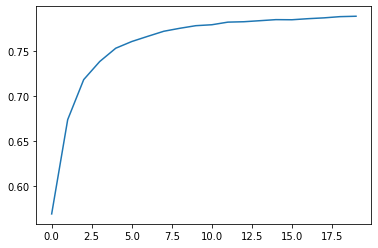

In [60]:
plt.plot([r2_score(Y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

*The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)*

In [62]:
m = RandomForestRegressor(n_estimators=20,n_jobs=-1)
m.fit(X_valid,Y_valid)
print_score(m)

[0.2966261515932037, 0.12210541883479249, 0.8125859346671339, 0.9692567748784631]


In [63]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
m.fit(X_valid,Y_valid)
print_score(m)

[0.289575157634968, 0.11364106241823013, 0.8213899427658019, 0.9733712904616683]


In [64]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1)
m.fit(X_valid,Y_valid)
print_score(m)

[0.2859933563266772, 0.1103513083374001, 0.8257811286903396, 0.9748907047660325]


# Out-of-bag (OOB) score#
*This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below*

In [65]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
m.fit(X_valid,Y_valid)
print_score(m)

[0.2914442544388395, 0.11425965472139765, 0.8190767823904084, 0.9730806006879933, 0.8070209827682235]


# Reducing over-fitting#
**1-Subsampling**

In [0]:
data_s=data1.sample(20000)

In [67]:
len(data_s)

20000

In [68]:
data_s.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand_New,fiModelDesc_New,fiBaseModel_New,fiSecondaryDesc_New,fiModelSeries_New,fiModelDescriptor_New,ProductSize_New,fiProductClassDesc_New,state_New,ProductGroup_New,ProductGroupDesc_New,Drive_System_New,Enclosure_New,Forks_New,Pad_Type_New,Ride_Control_New,Stick_New,Transmission_New,Turbocharged_New,Blade_Extension_New,Blade_Width_New,Enclosure_Type_New,Engine_Horsepower_New,Hydraulics_New,Pushblock_New,Ripper_New,Scarifier_New,Tip_Control_New,Tire_Size_New,Coupler_New,Coupler_System_New,Grouser_Tracks_New,Hydraulics_Flow_New,Track_Type_New,Undercarriage_Pad_Width_New,Stick_Length_New,Thumb_New,Pattern_Changer_New,Grouser_Type_New,Backhoe_Mounting_New,Blade_Type_New,Travel_Controls_New,Differential_Type_New,Steering_Controls_New,saleyear
11758,1177569,10.463103,375051,1451,121,3.0,2002,12260.0,1.0,347,72,2.0,4.0,10.0,2.0,20,4,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2008
140748,1502994,10.275051,1147227,4155,132,1.0,1980,0.0,1.0,1311,386,14.0,4.0,6.0,4.0,50,16,4,4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2004
19469,1206573,10.203592,1052272,4605,121,3.0,2003,2833.0,2.0,5,5,2.0,4.0,6.0,2.0,5,2,3,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2010
270102,1808264,9.472705,1218867,9552,132,1.0,2000,0.0,1.0,273,149,11.0,4.0,6.0,2.0,4,6,1,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2005
116129,1453365,10.373491,1114131,3854,132,1.0,1978,0.0,1.0,121,20,11.0,4.0,6.0,0.0,1,3,0,0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1998


In [0]:
X = data_s.drop('SalePrice',axis=1)

In [0]:
Y = data_s.SalePrice

In [71]:
X_train,X_valid=split_val(X,12000)
Y_train,Y_valid=split_val(Y,12000)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((12000, 52), (12000,), (8000, 52), (8000,))

In [72]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train,Y_train)
print_score(m)

CPU times: user 17.6 s, sys: 25 ms, total: 17.6 s
Wall time: 9.13 s
[0.10878538916614805, 0.2910317022133989, 0.9753869686037261, 0.8209283531450694, 0.8211719895465227]


**2-Tree building parameters**

*Another way to reduce over-fitting is to grow our trees less deeply*

In [73]:
m=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,n_jobs=1, oob_score=True)
m.fit(X_train,Y_train)
print_score(m)

[0.16388984114527302, 0.2969419164643699, 0.9441365137796113, 0.8135813995962333, 0.8124787669360938]


In [74]:
m=RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,n_jobs=-1,oob_score=True)
m.fit(X_train,Y_train)
print_score(m)

[0.17434338034679897, 0.2945297965854799, 0.9367828531982154, 0.8165977312803819, 0.8111708817034042]
